In [1]:
# Импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, 
    confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay
)
from sklearn.inspection import permutation_importance
import joblib
import json
import warnings
warnings.filterwarnings('ignore')

# Для воспроизводимости
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## 1. Загрузка и первичный анализ данных

In [2]:
# Загрузка данных
df = pd.read_csv('S06-hw-dataset-02.csv')

print(f"Размер датасета: {df.shape}")
print(f"\nПервые строки:")
df.head()

Размер датасета: (18000, 39)

Первые строки:


,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
0,1,-0.149235,-2.826966,-0.522901,-4.198449,1.364943,0.815043,-1.195518,-1.932232,2.396353,...,-0.159323,0.448015,0.572745,0.149916,0.878392,-0.679733,1.412751,0.421883,9.217167,1
1,2,-1.966180,-4.877542,0.268367,-9.607791,0.097149,1.347185,-3.872575,-0.395117,1.710068,...,-0.389212,1.383794,0.169876,0.043969,-0.963545,1.006643,-2.488690,9.590124,24.772826,0
2,3,-0.555964,-0.999920,0.209673,-14.119498,-1.808950,-0.006222,-4.651108,0.911944,-0.289037,...,-1.383970,3.044321,-0.182864,1.425649,-8.418598,-4.629754,-0.439798,0.555919,41.800517,0
3,4,-2.049199,-5.600713,-1.664677,-6.263893,-5.224455,0.848351,1.407210,-0.542080,0.119102,...,-2.713080,2.762637,-0.520796,-0.142455,1.668338,2.292810,-10.744916,11.476977,65.315860,0
4,5,-0.220556,4.889479,-2.235840,6.450046,0.774389,-2.382625,2.584816,4.211856,-0.317889,...,-1.302872,2.478862,1.528610,1.098131,3.547087,2.517757,-9.364106,-1.078404,93.017870,0


In [3]:
# Информация о данных
print("Информация о датасете:")
df.info()

print(f"\nПропущенные значения: {df.isnull().sum().sum()}")
print(f"\nСтатистика:")
df.describe()

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       18000 non-null  int64  
 1   f01      18000 non-null  float64
 2   f02      18000 non-null  float64
 3   f03      18000 non-null  float64
 4   f04      18000 non-null  float64
 5   f05      18000 non-null  float64
 6   f06      18000 non-null  float64
 7   f07      18000 non-null  float64
 8   f08      18000 non-null  float64
 9   f09      18000 non-null  float64
 10  f10      18000 non-null  float64
 11  f11      18000 non-null  float64
 12  f12      18000 non-null  float64
 13  f13      18000 non-null  float64
 14  f14      18000 non-null  float64
 15  f15      18000 non-null  float64
 16  f16      18000 non-null  float64
 17  f17      18000 non-null  float64
 18  f18      18000 non-null  float64
 19  f19      18000 non-null  float64
 20  f20      18000 non-null  fl

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,18000.000000
mean,9000.500000,-0.418555,0.614251,0.004559,0.059000,0.405086,0.012123,-0.283473,-0.266880,0.255107,...,-0.139825,0.108568,0.007238,0.000904,-0.716862,-0.274520,0.344991,1.517339,2.576221e+01,0.262611
std,5196.296758,2.178005,3.926778,1.000134,5.713672,2.497581,0.987226,2.193891,2.081431,2.225776,...,2.148834,2.234315,0.997861,1.002115,3.913704,2.482890,4.927315,10.630850,5.423748e+01,0.440065
min,1.000000,-10.014698,-15.510323,-4.031762,-23.663256,-12.289308,-3.741536,-9.591425,-8.293319,-13.655742,...,-8.171469,-9.214171,-3.937091,-3.963063,-19.389908,-10.031559,-20.768452,-107.788145,1.895059e-07,0.000000
25%,4500.750000,-1.866134,-2.048192,-0.673127,-3.544964,-1.153000,-0.653090,-1.743214,-1.688121,-1.177480,...,-1.589638,-1.369266,-0.663023,-0.684164,-3.286842,-1.897893,-2.752685,-2.018750,1.226029e+00,0.000000
50%,9000.500000,-0.465100,0.600291,0.003581,0.072826,0.485625,0.018765,-0.251263,-0.302463,0.350739,...,-0.204785,0.158715,0.001912,-0.003157,-0.618472,-0.339901,0.573153,0.318011,6.581865e+00,0.000000
75%,13500.250000,0.966393,3.229850,0.671390,3.689490,2.075739,0.689304,1.195481,1.109589,1.764113,...,1.254595,1.600671,0.677296,0.676558,1.948803,1.314163,3.649794,4.212111,2.576847e+01,1.000000
max,18000.000000,9.589975,15.417329,3.817025,26.815691,10.665184,3.528280,7.794627,8.892834,8.699629,...,9.290667,8.794320,4.341030,3.781380,14.065595,10.639974,20.226291,94.891804,1.103449e+03,1.000000


Распределение целевой переменной:
target
0    0.737389
1    0.262611
Name: proportion, dtype: float64

Дисбаланс классов: 2.81:1


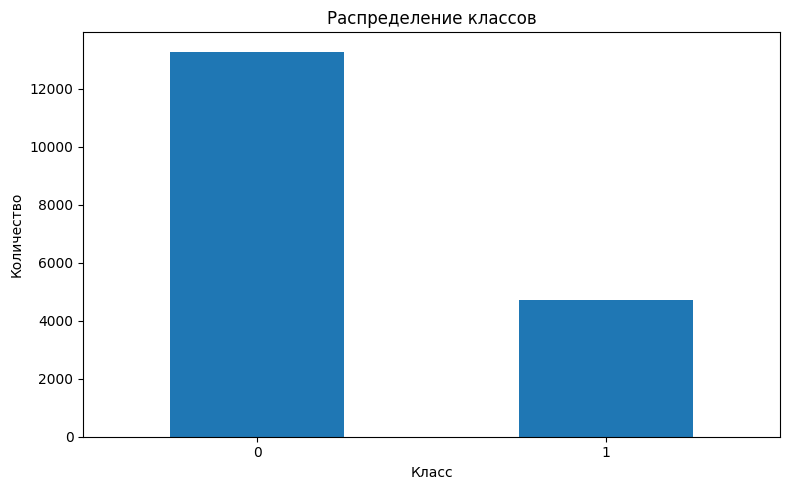

In [4]:
# Распределение целевой переменной
target_dist = df['target'].value_counts(normalize=True)
print("Распределение целевой переменной:")
print(target_dist)
print(f"\nДисбаланс классов: {target_dist[0] / target_dist[1]:.2f}:1")

# График
plt.figure(figsize=(8, 5))
df['target'].value_counts().plot(kind='bar')
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 2. Train/Test Split

Разделяем данные на train/test с фиксированным `random_state=42` и стратификацией по целевой переменной.  
Это важно для:
- **Воспроизводимости** результатов
- **Сохранения пропорций** классов в обеих выборках

In [5]:
# Подготовка признаков и таргета
X = df.drop(['id', 'target'], axis=1)
y = df['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)

print(f"Train размер: {X_train.shape}")
print(f"Test размер: {X_test.shape}")
print(f"\nTrain распределение: {y_train.value_counts(normalize=True).to_dict()}")
print(f"Test распределение: {y_test.value_counts(normalize=True).to_dict()}")

Train размер: (13500, 37)
Test размер: (4500, 37)

Train распределение: {0: 0.7374074074074074, 1: 0.2625925925925926}
Test распределение: {0: 0.7373333333333333, 1: 0.26266666666666666}


## 3. Baseline модели

In [6]:
# DummyClassifier - всегда предсказывает мажоритарный класс
dummy = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

print("DummyClassifier (baseline):")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_dummy):.4f}")
print(f"  F1-score: {f1_score(y_test, y_pred_dummy):.4f}")
print(f"  ROC-AUC: N/A (не возвращает вероятности)")

DummyClassifier (baseline):
  Accuracy: 0.7373
  F1-score: 0.0000
  ROC-AUC: N/A (не возвращает вероятности)


In [7]:
# LogisticRegression с нормализацией
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
])

lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_pipe.predict(X_test)
y_proba_lr = lr_pipe.predict_proba(X_test)[:, 1]

print("LogisticRegression (baseline):")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"  F1-score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_proba_lr):.4f}")

LogisticRegression (baseline):
  Accuracy: 0.8162
  F1-score: 0.5717
  ROC-AUC: 0.8009


## 4. Decision Tree с контролем сложности

In [8]:
# Контроль сложности через max_depth и min_samples_leaf
dt = DecisionTreeClassifier(
    max_depth=10, 
    min_samples_leaf=20, 
    random_state=RANDOM_STATE
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

print("DecisionTree:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"  F1-score: {f1_score(y_test, y_pred_dt):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_proba_dt):.4f}")

DecisionTree:
  Accuracy: 0.8322
  F1-score: 0.6535
  ROC-AUC: 0.8397


## 5. Random Forest

In [9]:
# Random Forest - bagging + случайность по признакам
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("RandomForest:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"  F1-score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_proba_rf):.4f}")

RandomForest:
  Accuracy: 0.8778
  F1-score: 0.7168
  ROC-AUC: 0.9212


## 6. Gradient Boosting

In [10]:
# Gradient Boosting - последовательное улучшени
gb = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=RANDOM_STATE
)

gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]

print("GradientBoosting:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"  F1-score: {f1_score(y_test, y_pred_gb):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_proba_gb):.4f}")

GradientBoosting:
  Accuracy: 0.8958
  F1-score: 0.7785
  ROC-AUC: 0.9221


## 7. Сравнение моделей

In [11]:
# Таблица результатов
results_df = pd.DataFrame({
    'Model': ['DummyClassifier', 'LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_dummy),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb)
    ],
    'F1': [
        f1_score(y_test, y_pred_dummy),
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_gb)
    ],
    'ROC-AUC': [
        None,
        roc_auc_score(y_test, y_proba_lr),
        roc_auc_score(y_test, y_proba_dt),
        roc_auc_score(y_test, y_proba_rf),
        roc_auc_score(y_test, y_proba_gb)
    ]
})

print("\nСравнение всех моделей:")
print(results_df.to_string(index=False))

# Лучшая модель
best_idx = results_df['ROC-AUC'].dropna().idxmax()
print(f"\n\nЛучшая модель: {results_df.loc[best_idx, 'Model']} (ROC-AUC={results_df.loc[best_idx, 'ROC-AUC']:.4f})")


Сравнение всех моделей:
             Model  Accuracy       F1  ROC-AUC
   DummyClassifier  0.737333 0.000000      NaN
LogisticRegression  0.816222 0.571724 0.800890
      DecisionTree  0.832222 0.653511 0.839702
      RandomForest  0.877778 0.716787 0.921249
  GradientBoosting  0.895778 0.778460 0.922107


Лучшая модель: GradientBoosting (ROC-AUC=0.9221)


## 8. ROC-кривые

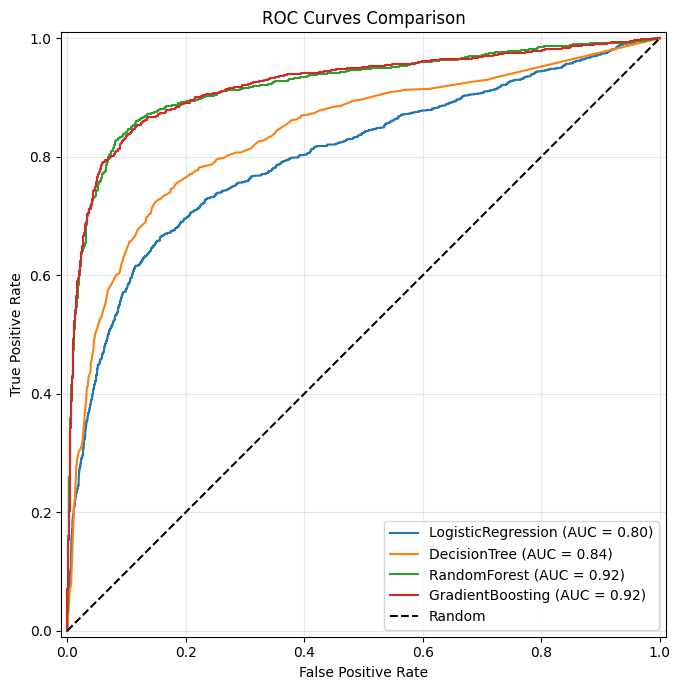

ROC кривые сохранены в artifacts/figures/roc_curves.png


In [12]:
# ROC curves для всех моделей с вероятностями
fig, ax = plt.subplots(figsize=(10, 7))

models_roc = [
    ('LogisticRegression', lr_pipe, y_proba_lr),
    ('DecisionTree', dt, y_proba_dt),
    ('RandomForest', rf, y_proba_rf),
    ('GradientBoosting', gb, y_proba_gb)
]

for name, model, y_proba in models_roc:
    RocCurveDisplay.from_predictions(y_test, y_proba, ax=ax, name=name)

ax.plot([0, 1], [0, 1], 'k--', label='Random')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves Comparison')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('artifacts/figures/roc_curves.png', dpi=150, bbox_inches='tight')
plt.show()


print("ROC кривые сохранены в artifacts/figures/roc_curves.png")

## 9. Confusion Matrix для лучшей модели

Confusion Matrix (GradientBoosting):
[[3207  111]
 [ 358  824]]


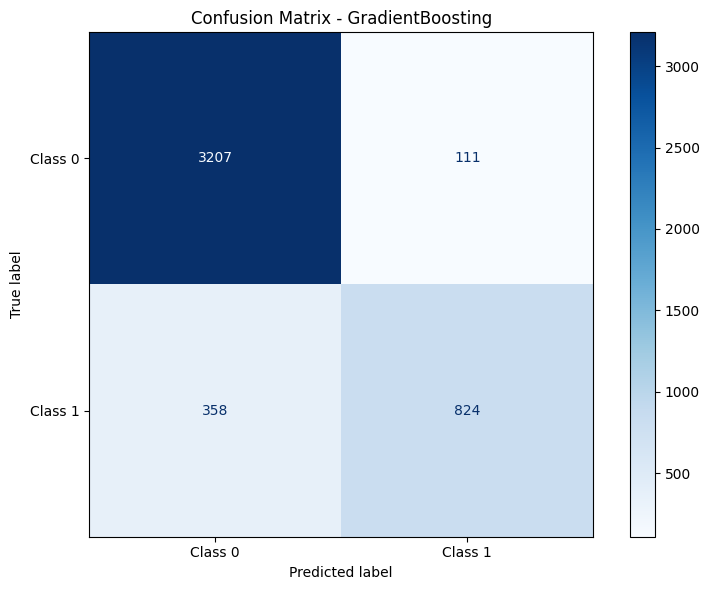


Confusion matrix сохранена в artifacts/figures/confusion_matrix.png


In [13]:
# Confusion matrix для GradientBoosting
cm = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix (GradientBoosting):")
print(cm)

fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1']).plot(ax=ax, cmap='Blues')
ax.set_title('Confusion Matrix - GradientBoosting')
plt.tight_layout()
plt.savefig('artifacts/figures/confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nConfusion matrix сохранена в artifacts/figures/confusion_matrix.png")

## 10. Feature Importance

Top-15 признаков по permutation importance:
 1. f16: 0.0924
 2. f01: 0.0402
 3. f23: 0.0188
 4. f30: 0.0160
 5. f08: 0.0150
 6. f29: 0.0150
 7. f07: 0.0141
 8. f15: 0.0139
 9. f19: 0.0132
10. f09: 0.0117
11. f18: 0.0109
12. f13: 0.0109
13. f12: 0.0108
14. f02: 0.0091
15. f34: 0.0091


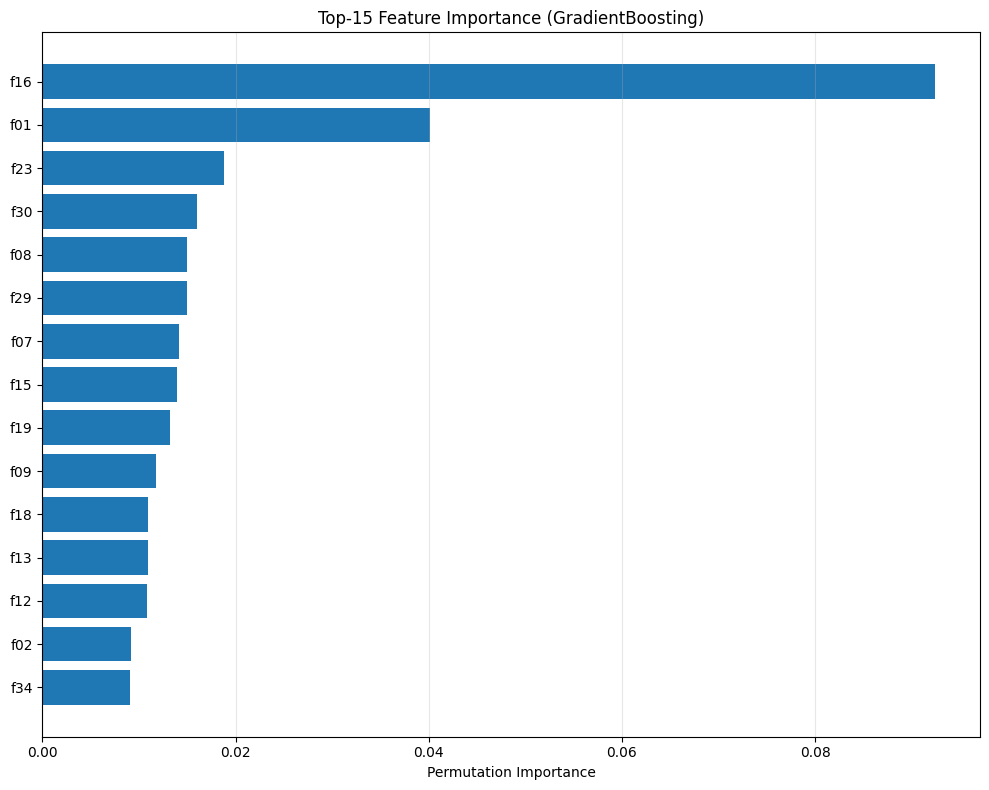


Feature importance сохранена в artifacts/figures/feature_importance.png


In [14]:
# Permutation importance для GradientBoosting
perm_importance = permutation_importance(
    gb, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=-1
)

# Топ-15 признаков
indices = np.argsort(perm_importance.importances_mean)[::-1][:15]
top_features = X.columns[indices]
top_importances = perm_importance.importances_mean[indices]

print("Top-15 признаков по permutation importance:")
for i, (feat, imp) in enumerate(zip(top_features, top_importances), 1):
    print(f"{i:2d}. {feat}: {imp:.4f}")

# График
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(top_features)), top_importances)
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features)
ax.set_xlabel('Permutation Importance')
ax.set_title('Top-15 Feature Importance (GradientBoosting)')
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('artifacts/figures/feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFeature importance сохранена в artifacts/figures/feature_importance.png")

## 11. Сохранение артефактов

In [15]:
# Сохраняем лучшую модель
joblib.dump(gb, 'artifacts/best_model.joblib')
print("Модель сохранена в artifacts/best_model.joblib")

# Метрики
metrics_test = {
    'DummyClassifier': {
        'accuracy': float(accuracy_score(y_test, y_pred_dummy)),
        'f1': float(f1_score(y_test, y_pred_dummy)),
        'roc_auc': None
    },
    'LogisticRegression': {
        'accuracy': float(accuracy_score(y_test, y_pred_lr)),
        'f1': float(f1_score(y_test, y_pred_lr)),
        'roc_auc': float(roc_auc_score(y_test, y_proba_lr))
    },
    'DecisionTree': {
        'accuracy': float(accuracy_score(y_test, y_pred_dt)),
        'f1': float(f1_score(y_test, y_pred_dt)),
        'roc_auc': float(roc_auc_score(y_test, y_proba_dt))
    },
    'RandomForest': {
        'accuracy': float(accuracy_score(y_test, y_pred_rf)),
        'f1': float(f1_score(y_test, y_pred_rf)),
        'roc_auc': float(roc_auc_score(y_test, y_proba_rf))
    },
    'GradientBoosting': {
        'accuracy': float(accuracy_score(y_test, y_pred_gb)),
        'f1': float(f1_score(y_test, y_pred_gb)),
        'roc_auc': float(roc_auc_score(y_test, y_proba_gb))
    }
}

with open('artifacts/metrics_test.json', 'w') as f:
    json.dump(metrics_test, f, indent=2)

print("Метрики сохранены в artifacts/metrics_test.json")
print("\nВсе артефакты созданы!")

Модель сохранена в artifacts/best_model.joblib
Метрики сохранены в artifacts/metrics_test.json

Все артефакты созданы!
